In [ ]:
from torchvision import datasets, transforms, models
import torch

models.resnet18()

img = torch.randn(1, 3, 32, 32)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import os

ResNet18

In [3]:
# 定义日志文件路径
event_acc_resnet18_dropout00_lr1e_1 = EventAccumulator('runs/resnet18/Sunday_23_June_2024_13h_19m_27s').Reload()
event_acc_resnet18_dropout05_lr1e_1 = EventAccumulator('runs/resnet18/Tuesday_25_June_2024_07h_47m_11s').Reload()
event_acc_resnet18_dropout02_lr1e_1 = EventAccumulator('runs/resnet18/Tuesday_25_June_2024_09h_06m_30s').Reload()
event_acc_resnet18_dropout02_lr2e_2 = EventAccumulator('runs/resnet18/Tuesday_25_June_2024_10h_34m_13s').Reload()

In [4]:
# 提取 epoch, loss 和 psnr 数据
epochs_train_resnet18_dropout00_lr1e_1 = [x.step for x in event_acc_resnet18_dropout00_lr1e_1.Scalars('Train/Accuracy')]
loss_train_resnet18_dropout00_lr1e_1 = [x.value for x in event_acc_resnet18_dropout00_lr1e_1.Scalars('Train/Average loss')]
acc_train_resnet18_dropout00_lr1e_1 = [x.value for x in event_acc_resnet18_dropout00_lr1e_1.Scalars('Train/Accuracy')]
loss_test_resnet18_dropout00_lr1e_1 = [x.value for x in event_acc_resnet18_dropout00_lr1e_1.Scalars('Test/Average loss')]
acc_test_resnet18_dropout00_lr1e_1 = [x.value for x in event_acc_resnet18_dropout00_lr1e_1.Scalars('Test/Accuracy')]

epochs_train_resnet18_dropout05_lr1e_1 = [x.step for x in event_acc_resnet18_dropout05_lr1e_1.Scalars('Train/Accuracy')]
loss_train_resnet18_dropout05_lr1e_1 = [x.value for x in event_acc_resnet18_dropout05_lr1e_1.Scalars('Train/Average loss')]
acc_train_resnet18_dropout05_lr1e_1 = [x.value for x in event_acc_resnet18_dropout05_lr1e_1.Scalars('Train/Accuracy')]
loss_test_resnet18_dropout05_lr1e_1 = [x.value for x in event_acc_resnet18_dropout05_lr1e_1.Scalars('Test/Average loss')]
acc_test_resnet18_dropout05_lr1e_1 = [x.value for x in event_acc_resnet18_dropout05_lr1e_1.Scalars('Test/Accuracy')]

epochs_train_resnet18_dropout02_lr1e_1 = [x.step for x in event_acc_resnet18_dropout02_lr1e_1.Scalars('Train/Accuracy')]
loss_train_resnet18_dropout02_lr1e_1 = [x.value for x in event_acc_resnet18_dropout02_lr1e_1.Scalars('Train/Average loss')]
acc_train_resnet18_dropout02_lr1e_1 = [x.value for x in event_acc_resnet18_dropout02_lr1e_1.Scalars('Train/Accuracy')]
loss_test_resnet18_dropout02_lr1e_1 = [x.value for x in event_acc_resnet18_dropout02_lr1e_1.Scalars('Test/Average loss')]
acc_test_resnet18_dropout02_lr1e_1 = [x.value for x in event_acc_resnet18_dropout02_lr1e_1.Scalars('Test/Accuracy')]

epochs_train_resnet18_dropout02_lr2e_2 = [x.step for x in event_acc_resnet18_dropout02_lr2e_2.Scalars('Train/Accuracy')]
loss_train_resnet18_dropout02_lr2e_2 = [x.value for x in event_acc_resnet18_dropout02_lr2e_2.Scalars('Train/Average loss')]
acc_train_resnet18_dropout02_lr2e_2 = [x.value for x in event_acc_resnet18_dropout02_lr2e_2.Scalars('Train/Accuracy')]
loss_test_resnet18_dropout02_lr2e_2 = [x.value for x in event_acc_resnet18_dropout02_lr2e_2.Scalars('Test/Average loss')]
acc_test_resnet18_dropout02_lr2e_2 = [x.value for x in event_acc_resnet18_dropout02_lr2e_2.Scalars('Test/Accuracy')]

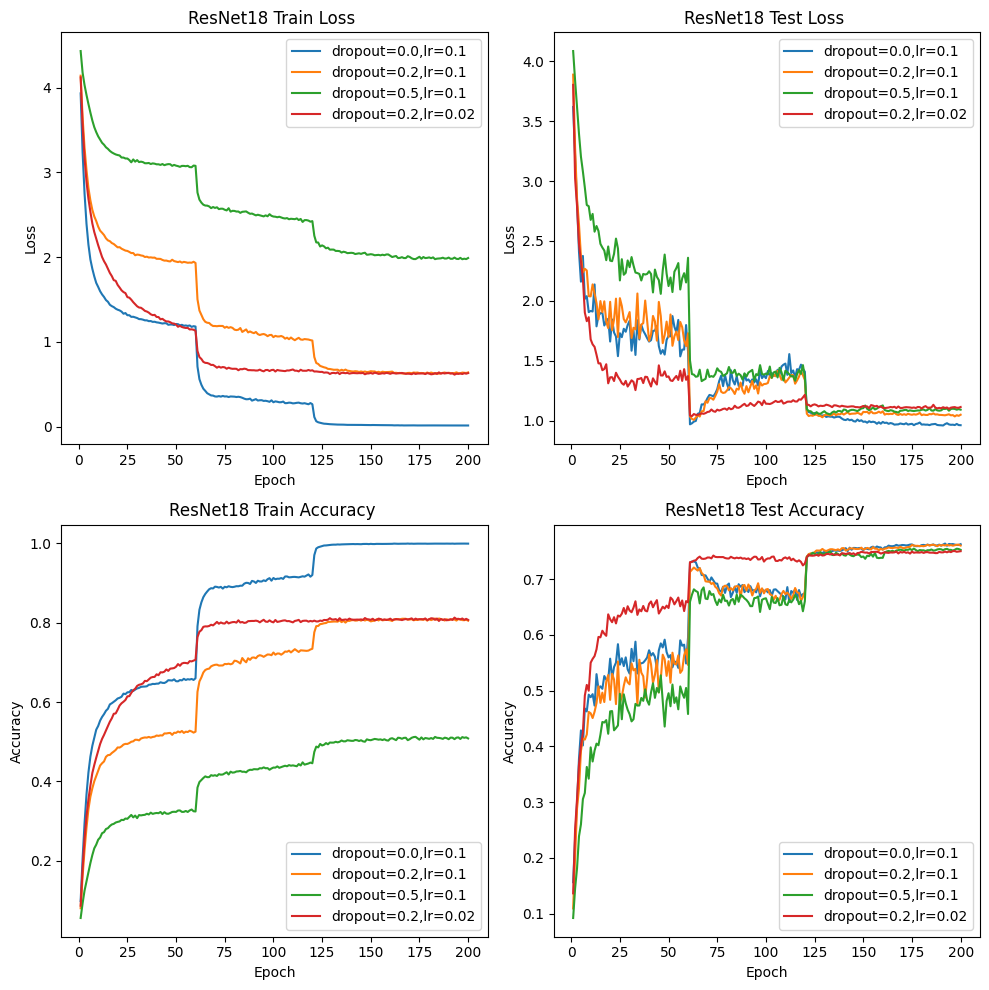

In [6]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(epochs_train_resnet18_dropout00_lr1e_1, loss_train_resnet18_dropout00_lr1e_1, label='dropout=0.0,lr=0.1')
plt.plot(epochs_train_resnet18_dropout02_lr1e_1, loss_train_resnet18_dropout02_lr1e_1, label='dropout=0.2,lr=0.1')
plt.plot(epochs_train_resnet18_dropout05_lr1e_1, loss_train_resnet18_dropout05_lr1e_1, label='dropout=0.5,lr=0.1')
plt.plot(epochs_train_resnet18_dropout02_lr2e_2, loss_train_resnet18_dropout02_lr2e_2, label='dropout=0.2,lr=0.02')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('ResNet18 Train Loss ')

plt.subplot(2, 2, 2)
plt.plot(epochs_train_resnet18_dropout00_lr1e_1, loss_test_resnet18_dropout00_lr1e_1, label='dropout=0.0,lr=0.1')
plt.plot(epochs_train_resnet18_dropout02_lr1e_1, loss_test_resnet18_dropout02_lr1e_1, label='dropout=0.2,lr=0.1')
plt.plot(epochs_train_resnet18_dropout05_lr1e_1, loss_test_resnet18_dropout05_lr1e_1, label='dropout=0.5,lr=0.1')
plt.plot(epochs_train_resnet18_dropout02_lr2e_2, loss_test_resnet18_dropout02_lr2e_2, label='dropout=0.2,lr=0.02')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('ResNet18 Test Loss ')

plt.subplot(2, 2, 3)
plt.plot(epochs_train_resnet18_dropout00_lr1e_1, acc_train_resnet18_dropout00_lr1e_1, label='dropout=0.0,lr=0.1')
plt.plot(epochs_train_resnet18_dropout02_lr1e_1, acc_train_resnet18_dropout02_lr1e_1, label='dropout=0.2,lr=0.1')
plt.plot(epochs_train_resnet18_dropout05_lr1e_1, acc_train_resnet18_dropout05_lr1e_1, label='dropout=0.5,lr=0.1')
plt.plot(epochs_train_resnet18_dropout02_lr2e_2, acc_train_resnet18_dropout02_lr2e_2, label='dropout=0.2,lr=0.02')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('ResNet18 Train Accuracy ')

plt.subplot(2, 2, 4)
plt.plot(epochs_train_resnet18_dropout00_lr1e_1, acc_test_resnet18_dropout00_lr1e_1, label='dropout=0.0,lr=0.1')
plt.plot(epochs_train_resnet18_dropout02_lr1e_1, acc_test_resnet18_dropout02_lr1e_1, label='dropout=0.2,lr=0.1')
plt.plot(epochs_train_resnet18_dropout05_lr1e_1, acc_test_resnet18_dropout05_lr1e_1, label='dropout=0.5,lr=0.1')
plt.plot(epochs_train_resnet18_dropout02_lr2e_2, acc_test_resnet18_dropout02_lr2e_2, label='dropout=0.2,lr=0.02')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('ResNet18 Test Accuracy ')

plt.tight_layout()

os.makedirs("plot_vis", exist_ok=True)
plt.savefig('plot_vis/resnet18_loss_acc.png')
plt.show()
plt.close()

In [10]:
print('dropout=0.0,lr=0.1', np.array(acc_test_resnet18_dropout00_lr1e_1).max(),np.array(acc_test_resnet18_dropout00_lr1e_1).argmax())
print('dropout=0.2,lr=0.1', np.array(acc_test_resnet18_dropout02_lr1e_1).max(),np.array(acc_test_resnet18_dropout02_lr1e_1).argmax())
print('dropout=0.5,lr=0.1', np.array(acc_test_resnet18_dropout05_lr1e_1).max(),np.array(acc_test_resnet18_dropout05_lr1e_1).argmax())
print('dropout=0.2,lr=0.02', np.array(acc_test_resnet18_dropout02_lr2e_2).max(),np.array(acc_test_resnet18_dropout02_lr2e_2).argmax())

dropout=0.0,lr=0.1 0.7635999917984009 191
dropout=0.2,lr=0.1 0.7616999745368958 198
dropout=0.5,lr=0.1 0.7545999884605408 175
dropout=0.2,lr=0.02 0.7500999569892883 195


ViT

In [9]:
# 定义日志文件路径
# event_acc_vit_dropout03_lr1e_2 = EventAccumulator('runs/vit/Monday_24_June_2024_08h_12m_31s').Reload()
event_acc_vit_dropout01_lr1e_2 = EventAccumulator('runs/vit/Monday_24_June_2024_11h_24m_12s').Reload()
event_acc_vit_dropout03_lr1e_2 = EventAccumulator('runs/vit/Monday_24_June_2024_11h_42m_21s').Reload()
event_acc_vit_dropout03_lr2e_2 = EventAccumulator('runs/vit/Monday_24_June_2024_11h_42m_33s').Reload()
event_acc_vit_dropout01_lr2e_2 = EventAccumulator('runs/vit/Tuesday_25_June_2024_07h_30m_07s').Reload()
event_acc_vit_dropout01_lr15e_3 = EventAccumulator('runs/vit/Tuesday_25_June_2024_07h_32m_20s').Reload()

In [12]:

# 提取 epoch, loss 和 psnr 数据
epochs_train_vit_dropout01_lr1e_2 = [x.step for x in event_acc_vit_dropout01_lr1e_2.Scalars('Train/Accuracy')]
loss_train_vit_dropout01_lr1e_2 = [x.value for x in event_acc_vit_dropout01_lr1e_2.Scalars('Train/Average loss')]
acc_train_vit_dropout01_lr1e_2 = [x.value for x in event_acc_vit_dropout01_lr1e_2.Scalars('Train/Accuracy')]
loss_test_vit_dropout01_lr1e_2 = [x.value for x in event_acc_vit_dropout01_lr1e_2.Scalars('Test/Average loss')]
acc_test_vit_dropout01_lr1e_2 = [x.value for x in event_acc_vit_dropout01_lr1e_2.Scalars('Test/Accuracy')]

epochs_train_vit_dropout03_lr1e_2 = [x.step for x in event_acc_vit_dropout03_lr1e_2.Scalars('Train/Accuracy')]
loss_train_vit_dropout03_lr1e_2 = [x.value for x in event_acc_vit_dropout03_lr1e_2.Scalars('Train/Average loss')]
acc_train_vit_dropout03_lr1e_2 = [x.value for x in event_acc_vit_dropout03_lr1e_2.Scalars('Train/Accuracy')]
loss_test_vit_dropout03_lr1e_2 = [x.value for x in event_acc_vit_dropout03_lr1e_2.Scalars('Test/Average loss')]
acc_test_vit_dropout03_lr1e_2 = [x.value for x in event_acc_vit_dropout03_lr1e_2.Scalars('Test/Accuracy')]

epochs_train_vit_dropout03_lr2e_2 = [x.step for x in event_acc_vit_dropout03_lr2e_2.Scalars('Train/Accuracy')]
loss_train_vit_dropout03_lr2e_2 = [x.value for x in event_acc_vit_dropout03_lr2e_2.Scalars('Train/Average loss')]
acc_train_vit_dropout03_lr2e_2 = [x.value for x in event_acc_vit_dropout03_lr2e_2.Scalars('Train/Accuracy')]
loss_test_vit_dropout03_lr2e_2 = [x.value for x in event_acc_vit_dropout03_lr2e_2.Scalars('Test/Average loss')]
acc_test_vit_dropout03_lr2e_2 = [x.value for x in event_acc_vit_dropout03_lr2e_2.Scalars('Test/Accuracy')]

epochs_train_vit_dropout01_lr2e_2 = [x.step for x in event_acc_vit_dropout01_lr2e_2.Scalars('Train/Accuracy')]
loss_train_vit_dropout01_lr2e_2 = [x.value for x in event_acc_vit_dropout01_lr2e_2.Scalars('Train/Average loss')]
acc_train_vit_dropout01_lr2e_2 = [x.value for x in event_acc_vit_dropout01_lr2e_2.Scalars('Train/Accuracy')]
loss_test_vit_dropout01_lr2e_2 = [x.value for x in event_acc_vit_dropout01_lr2e_2.Scalars('Test/Average loss')]
acc_test_vit_dropout01_lr2e_2 = [x.value for x in event_acc_vit_dropout01_lr2e_2.Scalars('Test/Accuracy')]

epochs_train_vit_dropout01_lr15e_3 = [x.step for x in event_acc_vit_dropout01_lr15e_3.Scalars('Train/Accuracy')]
loss_train_vit_dropout01_lr15e_3 = [x.value for x in event_acc_vit_dropout01_lr15e_3.Scalars('Train/Average loss')]
acc_train_vit_dropout01_lr15e_3 = [x.value for x in event_acc_vit_dropout01_lr15e_3.Scalars('Train/Accuracy')]
loss_test_vit_dropout01_lr15e_3 = [x.value for x in event_acc_vit_dropout01_lr15e_3.Scalars('Test/Average loss')]
acc_test_vit_dropout01_lr15e_3 = [x.value for x in event_acc_vit_dropout01_lr15e_3.Scalars('Test/Accuracy')]

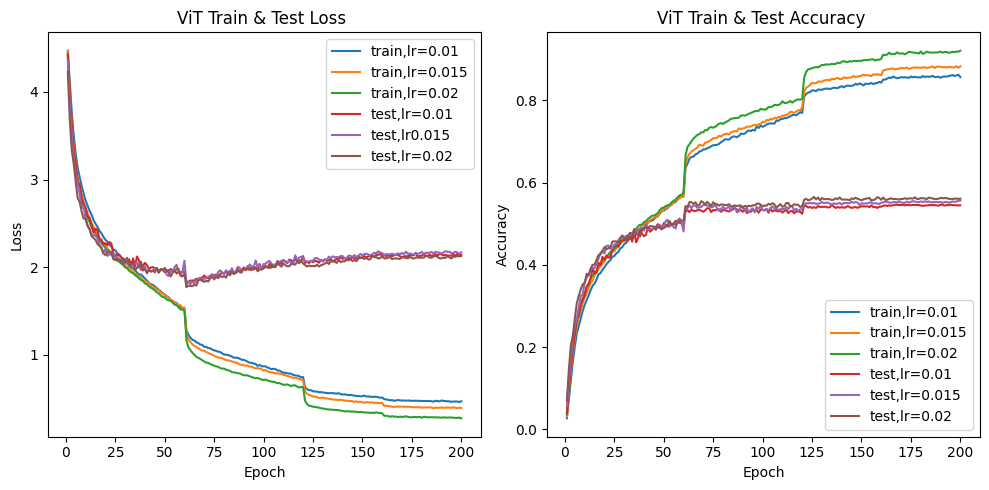

In [13]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_train_vit_dropout01_lr1e_2, loss_train_vit_dropout01_lr1e_2, label='train,lr=0.01')
plt.plot(epochs_train_vit_dropout01_lr15e_3, loss_train_vit_dropout01_lr15e_3, label='train,lr=0.015')
plt.plot(epochs_train_vit_dropout01_lr2e_2, loss_train_vit_dropout01_lr2e_2, label='train,lr=0.02')
plt.plot(epochs_train_vit_dropout01_lr1e_2, loss_test_vit_dropout01_lr1e_2, label='test,lr=0.01')
plt.plot(epochs_train_vit_dropout01_lr15e_3, loss_test_vit_dropout01_lr15e_3, label='test,lr0.015')
plt.plot(epochs_train_vit_dropout01_lr2e_2, loss_test_vit_dropout01_lr2e_2, label='test,lr=0.02')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('ViT Train & Test Loss ')

plt.subplot(1, 2, 2)
plt.plot(epochs_train_vit_dropout01_lr1e_2, acc_train_vit_dropout01_lr1e_2, label='train,lr=0.01')
plt.plot(epochs_train_vit_dropout01_lr15e_3, acc_train_vit_dropout01_lr15e_3, label='train,lr=0.015')
plt.plot(epochs_train_vit_dropout01_lr2e_2, acc_train_vit_dropout01_lr2e_2, label='train,lr=0.02')
plt.plot(epochs_train_vit_dropout01_lr1e_2, acc_test_vit_dropout01_lr1e_2, label='test,lr=0.01')
plt.plot(epochs_train_vit_dropout01_lr15e_3, acc_test_vit_dropout01_lr15e_3, label='test,lr=0.015')
plt.plot(epochs_train_vit_dropout01_lr2e_2, acc_test_vit_dropout01_lr2e_2, label='test,lr=0.02')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('ViT Train & Test Accuracy ')

plt.tight_layout()

os.makedirs("plot_vis", exist_ok=True)
plt.savefig('plot_vis/vit_loss_acc.png')
plt.show()
plt.close()

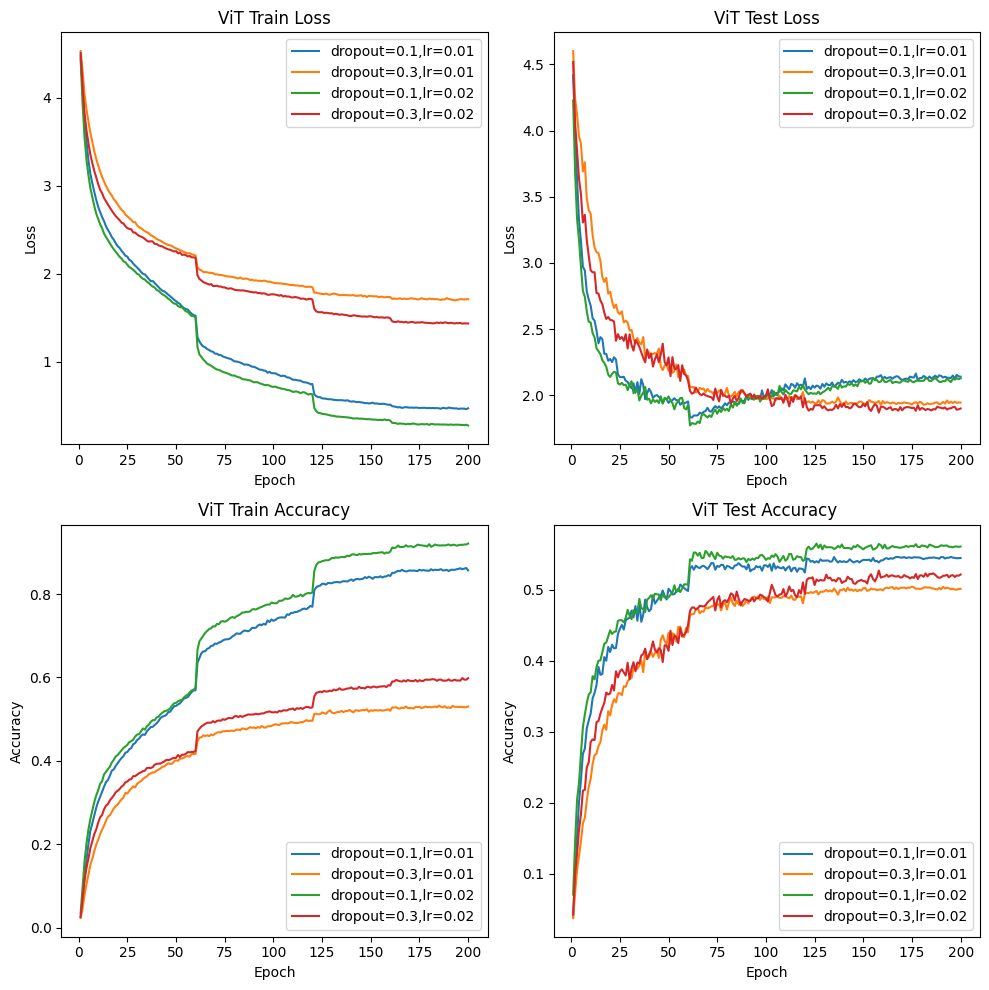

In [14]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(epochs_train_vit_dropout01_lr1e_2, loss_train_vit_dropout01_lr1e_2, label='dropout=0.1,lr=0.01')
plt.plot(epochs_train_vit_dropout03_lr1e_2, loss_train_vit_dropout03_lr1e_2, label='dropout=0.3,lr=0.01')
plt.plot(epochs_train_vit_dropout01_lr2e_2, loss_train_vit_dropout01_lr2e_2, label='dropout=0.1,lr=0.02')
plt.plot(epochs_train_vit_dropout03_lr2e_2, loss_train_vit_dropout03_lr2e_2, label='dropout=0.3,lr=0.02')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('ViT Train Loss')

plt.subplot(2, 2, 2)
plt.plot(epochs_train_vit_dropout01_lr1e_2, loss_test_vit_dropout01_lr1e_2, label='dropout=0.1,lr=0.01')
plt.plot(epochs_train_vit_dropout03_lr1e_2, loss_test_vit_dropout03_lr1e_2, label='dropout=0.3,lr=0.01')
plt.plot(epochs_train_vit_dropout01_lr2e_2, loss_test_vit_dropout01_lr2e_2, label='dropout=0.1,lr=0.02')
plt.plot(epochs_train_vit_dropout03_lr2e_2, loss_test_vit_dropout03_lr2e_2, label='dropout=0.3,lr=0.02')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('ViT Test Loss')

plt.subplot(2, 2, 3)
plt.plot(epochs_train_vit_dropout01_lr1e_2, acc_train_vit_dropout01_lr1e_2, label='dropout=0.1,lr=0.01')
plt.plot(epochs_train_vit_dropout03_lr1e_2, acc_train_vit_dropout03_lr1e_2, label='dropout=0.3,lr=0.01')
plt.plot(epochs_train_vit_dropout01_lr2e_2, acc_train_vit_dropout01_lr2e_2, label='dropout=0.1,lr=0.02')
plt.plot(epochs_train_vit_dropout03_lr2e_2, acc_train_vit_dropout03_lr2e_2, label='dropout=0.3,lr=0.02')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('ViT Train Accuracy')

plt.subplot(2, 2, 4)
plt.plot(epochs_train_vit_dropout01_lr1e_2, acc_test_vit_dropout01_lr1e_2, label='dropout=0.1,lr=0.01')
plt.plot(epochs_train_vit_dropout03_lr1e_2, acc_test_vit_dropout03_lr1e_2, label='dropout=0.3,lr=0.01')
plt.plot(epochs_train_vit_dropout01_lr2e_2, acc_test_vit_dropout01_lr2e_2, label='dropout=0.1,lr=0.02')
plt.plot(epochs_train_vit_dropout03_lr2e_2, acc_test_vit_dropout03_lr2e_2, label='dropout=0.3,lr=0.02')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('ViT Test Accuracy ')

plt.tight_layout()

os.makedirs("plot_vis", exist_ok=True)
plt.savefig('plot_vis/vit_dropout.png')
plt.show()
plt.close()

In [15]:
print('dropout=0.1,lr=0.01', np.array(acc_test_vit_dropout01_lr1e_2).max(),np.array(acc_test_vit_dropout01_lr1e_2).argmax())
print('dropout=0.3,lr=0.01', np.array(acc_test_vit_dropout03_lr1e_2).max(),np.array(acc_test_vit_dropout03_lr1e_2).argmax())
print('dropout=0.1,lr=0.02', np.array(acc_test_vit_dropout01_lr2e_2).max(),np.array(acc_test_vit_dropout01_lr2e_2).argmax())
print('dropout=0.3,lr=0.02', np.array(acc_test_vit_dropout03_lr2e_2).max(),np.array(acc_test_vit_dropout03_lr2e_2).argmax())
print('dropout=0.1,lr=0.015', np.array(acc_test_vit_dropout01_lr15e_3).max(),np.array(acc_test_vit_dropout01_lr15e_3).argmax())

dropout=0.1,lr=0.01 0.5464000105857849 166
dropout=0.3,lr=0.01 0.5044000148773193 174
dropout=0.1,lr=0.02 0.5651999711990356 125
dropout=0.3,lr=0.02 0.5270999670028687 157
dropout=0.1,lr=0.015 0.5564000010490417 199
